<a href="https://colab.research.google.com/github/jadercaro/Curso-Deep-Learning-20242/blob/main/U4_LAB_02_Transfer_learning_XX_TEACHER_XX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 4.2 - Transfer learning

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L04.02", varname="student");

logging in as jader.caro@udea.edu.co ... please wait

-------------
using course session 2021.deeplearning::udea.20242
success!! you are logged in
-------------


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

<big><font color="red">BE PATIENT IN THIS LAB, MODELS ARE LARGE AND MAY TAKE A WHILE TO DOWNLOAD, TRAIN, MAKE INFERENCE, and ALSO FOR GRADERS TO EVALUATE YOUR SUBMISSION.</font></big>

You may want to set the runtime to GPU if in Google Colab

In [ ]:
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import h5py
import pandas as pd
import tensorflow as tf

%matplotlib inline

## TASK 1: `tensorflow hub` classification model

Complete the following function so that it uses the [Inception V1 model on `tensorflow hub`](https://tfhub.dev/google/imagenet/inception_v1/classification/4) to obtain the three top ImageNet labels for a given image, along with their probabilities. Observe that:

- the input `img` is an `np.array` of dims `[w,h,3]`
- the model returns `logits` which must be transformed into probabilities with a softmax function: $p_i = \frac{e^{L_i}}{\sum_j e^{L_j}}$, where $p_i$ is the probability of class $i$ and $L_i$ is the `logit` assigned to that class
- you must **resize** the input `img` to dimensions `[1,224,224,3]`. Use [`skimage.transform.resize`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize) with `anti_aliasing=True`.
- you must ensure the **pixel values** of `img` are in the `[0,1]` range. Normalize the image pixel values by substracting the minimum value and dividing by the difference between the maximum and the minimum.
- the logits returned by the model correspond to the labels in [this file](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt) as described in the tensorflob hub model page. This list is passed to your function in the `labels_list` argument.
- you **must return** a dictionary with three elements, containing the class labels as keys and the probabilities as values.

For instance, for the following image you should return this dictionary:

      {'king snake': 0.8190326,
       'ringneck snake': 0.026169779,
       'sea snake': 0.030096276}


    

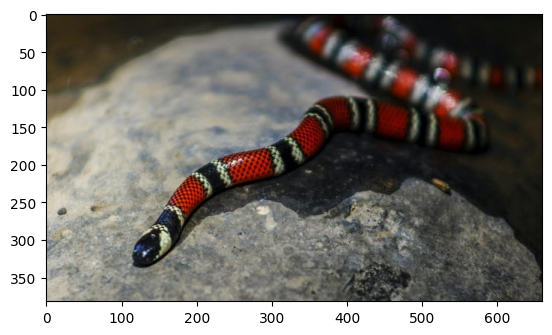

In [ ]:
snake_img = imread('local/imgs/snake.jpg')
plt.imshow(snake_img)

In [ ]:
with open("local/data/ImageNetLabels.txt", "r") as f:
    labels_list = [i.rstrip() for i in f.readlines()]


def get_top3_inceptionv1_labels(img, labels_list):

    from skimage.transform import resize
    m = tf.keras.Sequential([
    hub.KerasLayer("https://kaggle.com/models/google/inception-v1/TensorFlow2/classification/1")
      ])
    m.build([None, 224, 224, 3])  # Batch input shape.

    # Redimensionar la imagen a 224x224
    rimg = resize(img, (224, 224), anti_aliasing=True)

    # Normalizar la imagen
    rimg = (rimg.astype(np.float32) - rimg.min()) / (rimg.max() - rimg.min())

    # Añadir la dimensión de batch (1, 224, 224, 3)
    rimg = np.expand_dims(rimg, axis=0)

    # Predecir las probabilidades
    logits = m(rimg)  # Pasar la imagen redimensionada al modelo
    logits = logits[0]

    # Aplicar softmax para obtener las probabilidades
    probs = tf.nn.softmax(logits).numpy()

    # Obtener las 3 etiquetas con mayor probabilidad
    top3_indices = probs.argsort()[-3:][::-1]  # Índices de las 3 mayores probabilidades
    top3_labels = {labels_list[i]: float(probs[i]) for i in top3_indices}

    return top3_labels


print(tf.__version__)
print(hub.__version__)


2.15.0
0.16.1


In [ ]:
snake_img.shape

(382, 660, 3)

In [ ]:
import tf_keras as keras
keras.Sequential(layers=[hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/4")])

check your code with the image above

In [ ]:
get_top3_inceptionv1_labels(snake_img, labels_list)


{'king snake': 0.816961944103241,
 'sea snake': 0.03432006761431694,
 'ringneck snake': 0.02484898827970028}

{'Egyptian cat': 0.08435085415840149,
 'tabby': 0.0428490936756134,
 'king penguin': 0.036139361560344696}

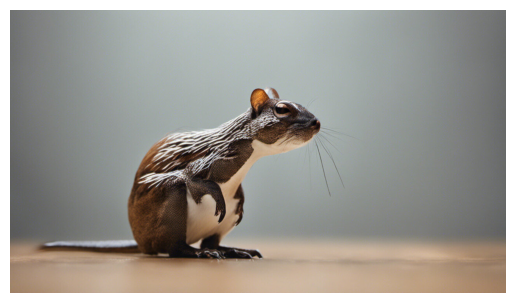

In [ ]:
url_chimp = 'https://scx2.b-cdn.net/gfx/news/2019/canwereallyk.jpg'
!wget -q -O img.jpg $url_chimp
img = imread('img.jpg')
plt.imshow(img); plt.axis("off")
get_top3_inceptionv1_labels(img, labels_list)

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T1');

## TASK 2: `tensorflow hub` feature extraction model

complete the following function such that when given a set of images returns the feature vectors extracted for each image with the [InceptionV1](https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4) `tensorflow hub` model.

Observe that:

- `tensorflow hub` publishes a different model service for classification or for feature extraction
- `imgs` can be any array of shape `[n_images, w, h, n_channels]`
- the output must be of shape `[n_images, 1024]`
- you must return a `numpy` array

In [ ]:
!wget -nc -q https://s3.amazonaws.com/rlx/mini_cifar.h5
with h5py.File('mini_cifar.h5','r') as h5f:
    x_cifar = h5f["x"][:][:1000]
    y_cifar = h5f["y"][:][:1000]
x_cifar.shape, y_cifar.shape

((1000, 32, 32, 3), (1000,))

In [ ]:
def feature_vector_inceptionv1(imgs):
    m = tf.keras.Sequential([
    hub.KerasLayer("https://kaggle.com/models/google/inception-v1/TensorFlow2/feature-vector/1",
               trainable=True, arguments=dict(batch_norm_momentum=0.997))
    ])
    m.build([None, 224, 224, 3])
    features = m(imgs).numpy()
    return features

observe we can extract the features of our mini cifar dataset

In [ ]:
xf_cifar = feature_vector_inceptionv1(x_cifar)
xf_cifar.shape

(1000, 1024)

check your code, this sum must be close to:

      array([186.98825, 436.80975, 237.31288, 353.58902, 492.95978, 307.38007,
            234.02158, 260.64508, 186.74268, 265.00177], dtype=float32)

In [ ]:
xf_cifar.sum(axis=1)[:10]

array([186.9881 , 436.8098 , 237.3129 , 353.58905, 492.95972, 307.38   ,
       234.02145, 260.64493, 186.74275, 265.0017 ], dtype=float32)

observe we can do many things now with the features such as

- compute similarity between images in this feature space
- use any classical machine learning method
- etc.

similarity in feature space 35.687943


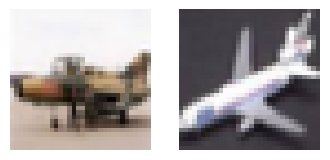

In [ ]:
i,j = np.random.randint(len(xf_cifar), size=2)
imgA, imgB = x_cifar[i], x_cifar[j]
plt.figure(figsize=(4,2))
plt.subplot(121); plt.imshow(imgA); plt.axis("off")
plt.subplot(122); plt.imshow(imgB); plt.axis("off");
print ("similarity in feature space", np.linalg.norm(xf_cifar[i]-xf_cifar[j]))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

estimator = SVC(gamma=.001)
cross_val_score(estimator, xf_cifar, y_cifar)


array([0.755, 0.73 , 0.775, 0.765, 0.73 ])

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T2');

## TASK 3: Model for fine tuning

Complete the following function so that it builds a model with three layers:

- one `hub.KerasLayer` with [https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1](https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1) feature vector extraction and `trainable` according to the function parameter.
- one `Dense` layer with `dense_size` neurons and `relu` activation
- one `Dense` layer as output with 3 neurons (one for each class) and `softmax` activation

In [ ]:
def create_model(trainable=False, dense_size=100):
    num_classes = 3

    # Cargar el modelo de Inception V1 desde TensorFlow Hub
    base_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/4",
                                 trainable=trainable)

    # Crear el modelo
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Dense(dense_size, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax'),
    ])

    return model

with `dense_size=100` and `input_shape=[None, 32, 32, 3]` your model should have a total of `64,354,083` parameters, with only  `256,403` trainable params if `trainable=False`, and `64,043,363` if `trainable=True`

In [ ]:
m = create_model(trainable=True)
m.build(input_shape=[None, 32, 32, 3])
m.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1024)              5607184   
                                                                 
 dense (Dense)               (None, 100)               102500    
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5709987 (21.78 MB)
Trainable params: 5695427 (21.73 MB)
Non-trainable params: 14560 (56.88 KB)
_________________________________________________________________


you can now train your model. If you set `trainable=True` you should get >80% accuracy in validation with 10-30 epochs

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_cifar, y_cifar, test_size=.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800, 32, 32, 3) (800,) (200, 32, 32, 3) (200,)


In [ ]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
m.fit(x_train, y_train, epochs=10,batch_size=16, validation_data=(x_test, y_test))

Epoch 1/10
50/50 [==============================] - 27s 258ms/step - loss: 1.1889 - accuracy: 0.5575 - val_loss: 2.1471 - val_accuracy: 0.5750
Epoch 2/10
50/50 [==============================] - 12s 240ms/step - loss: 0.7965 - accuracy: 0.7675 - val_loss: 2.4057 - val_accuracy: 0.6200
Epoch 3/10
50/50 [==============================] - 12s 239ms/step - loss: 0.6038 - accuracy: 0.8450 - val_loss: 0.8651 - val_accuracy: 0.8050
Epoch 4/10
50/50 [==============================] - 12s 237ms/step - loss: 0.5098 - accuracy: 0.8750 - val_loss: 1.1154 - val_accuracy: 0.7300
Epoch 5/10
50/50 [==============================] - 10s 207ms/step - loss: 0.4381 - accuracy: 0.8988 - val_loss: 0.8082 - val_accuracy: 0.8300
Epoch 6/10
50/50 [==============================] - 12s 234ms/step - loss: 0.3945 - accuracy: 0.9237 - val_loss: 0.7465 - val_accuracy: 0.8150
Epoch 7/10
50/50 [==============================] - 12s 231ms/step - loss: 0.3517 - accuracy: 0.9362 - val_loss: 0.6935 - val_accuracy: 0.8450

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T3');